# Import Librarys


In [1]:
import pandas as pd # pandas use to manipulate the data
import matplotlib.pyplot as plt #use for visualization
import seaborn as sns ##use for advance visualization

# About this file
Use the Titanic dataset to build a model that predicts whether a
passenger on the Titanic survived or not. This is a classic beginner
project with readily available dat
a.
The dataset typically used for this project contains information
about individual passengers, such as their age, gender, ticket
class, fare, cabin, and whether or not they survived.

# Data collection and processing

In [2]:
df = pd.read_csv("/content/Titanic-Dataset.csv") #Load the dataset

In [3]:
df.head() #head use for starting 5 rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info() # info use for know the data type are present in our dataset how many memory are use this dataset to store data and how many total columns are present etc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.columns # columns use to know the names of the all columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.shape # shape use for know about the total row and columns

(891, 12)

In [7]:
df.shape[0]*df.shape[1] #it show the total data present in the datasets

10692

In [8]:
df.isnull().sum() # isnull use to know how many null values are present in the dataset

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


# Hendling missing data

In [10]:
# drop the "Cabin" column from the dataframe
df = df.drop(columns='Cabin', axis=1)

In [11]:
# replacing the missing values in "Age" column with mean value
df['Age'].fillna(df['Age'].mean(), inplace=True)

<ipython-input-11-bb3c0ec081ae>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [13]:
# finding the mode value of "Embarked" column
print(df['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [14]:
print(df['Embarked'].mode()[0])

S


In [16]:
# replacing the missing values in "Embarked" column with mode value
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

<ipython-input-16-ae2c81114828>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [18]:
# check the number of missing values in each column
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [20]:
# getting some statistical measures about the data
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
# value of count use for know the no of people Survived and not Survived
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [22]:
# value  count use for know the no of  Male and female
df['Sex'].value_counts()

,count
Sex,
male,577
female,314


# Outlire

<Axes: >

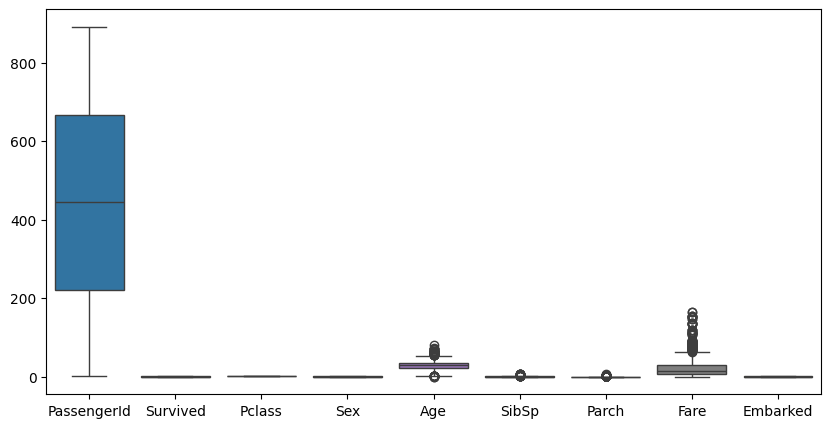

In [55]:
plt.figure(figsize=(10,5))
sns.boxplot(df)

<Axes: ylabel='Fare'>

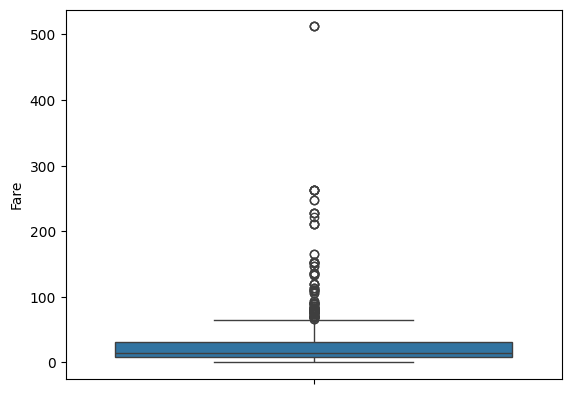

In [48]:
sns.boxplot(df["Fare"])

# Handling Outlires

In [56]:
# handling Outlire withe the help of Z Score
for i in df[["Age","SibSp","Parch","Fare"]]:
    Upper_Boundary = df[i].mean() + 3 * df[i].std()
    Lower_Boundary = df[i].mean() - 3 * df[i].std()
df =df[(df['Fare']<Upper_Boundary) & (df['Fare']>Lower_Boundary)]

In [57]:
df.shape

(849, 11)

In [58]:

# we can see we have a 891 rows in dataset and after Handling outlire we have 849 data

<Axes: >

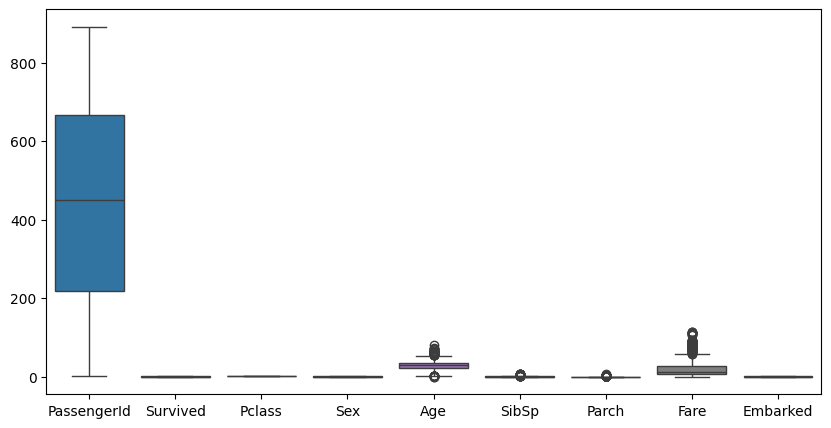

In [59]:
plt.figure(figsize=(10,5))
sns.boxplot(df)

# Data Visualization

[Text(0, 0, '539'), Text(0, 0, '310')]

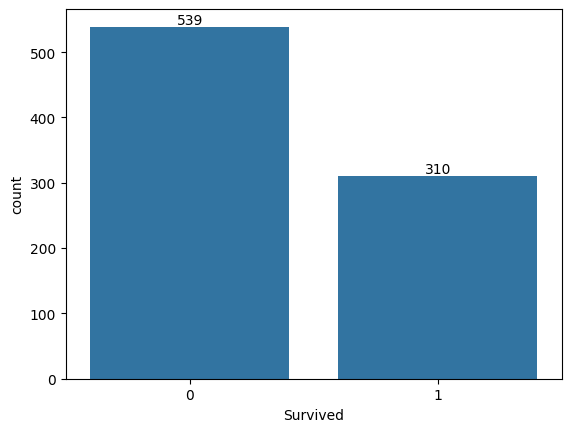

In [60]:
#use a countplot to count the number for Survived peoples on non survived by bar graph
ax = sns.countplot(x= "Survived",data = df)
ax.bar_label(ax.containers[0])

In [61]:
sns.set()

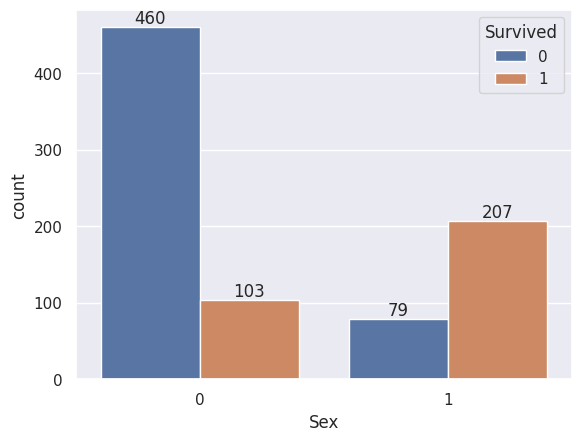

In [62]:
#use a countplot to count the number for Survived peoples on non survived by by gender

ax = sns.countplot(data = df, x = 'Sex', hue = 'Survived')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Survived', ylabel='Sex'>

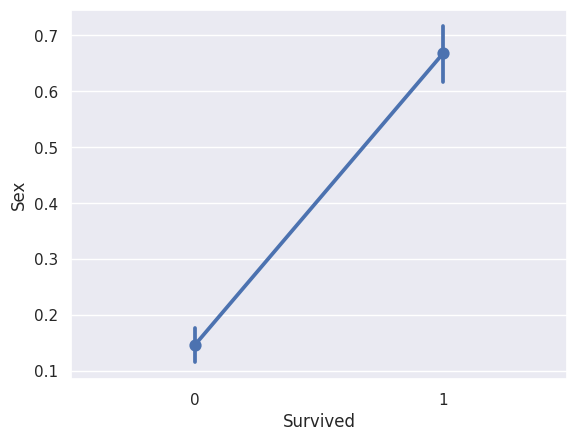

In [63]:
sns.pointplot(x = df.Survived,y = df.Sex)

[Text(0, 0, '660'),
 Text(0, 0, '109'),
 Text(0, 0, '66'),
 Text(0, 0, '5'),
 Text(0, 0, '3'),
 Text(0, 0, '5'),
 Text(0, 0, '1')]

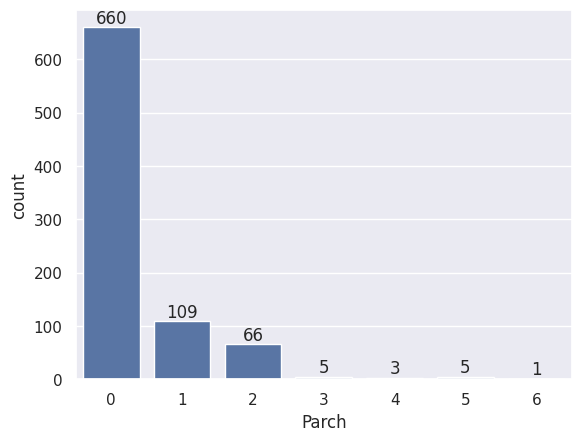

In [64]:
#use a countplot to count the number for parents/Children aboard the titanic
ax = sns.countplot(x= "Parch",data = df)
ax.bar_label(ax.containers[0])

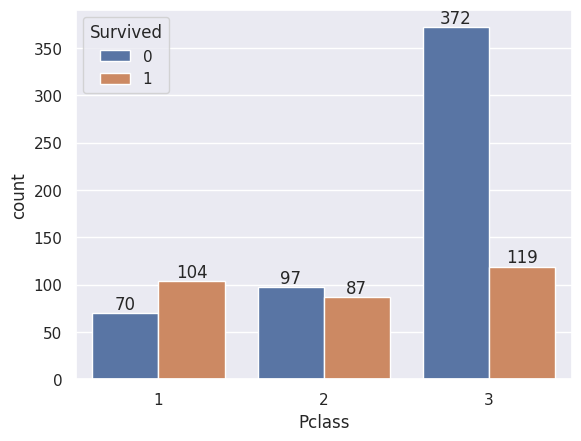

In [65]:
ax = sns.countplot(data = df, x = 'Pclass', hue = 'Survived')

for bars in ax.containers:
    ax.bar_label(bars)

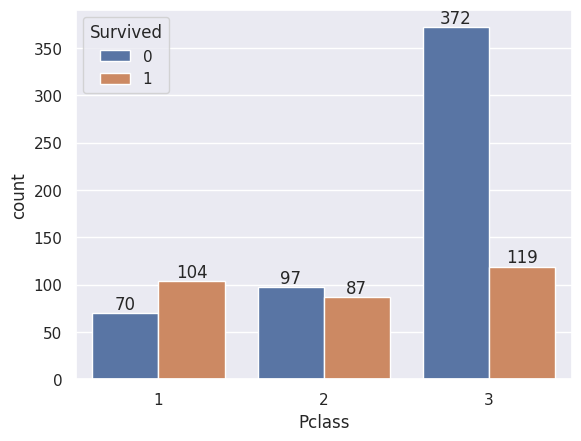

In [66]:
ax = sns.countplot(data = df, x = 'Pclass', hue = 'Survived')

for bars in ax.containers:
    ax.bar_label(bars)

Text(0.5, 0, 'No_Of_Siblings')

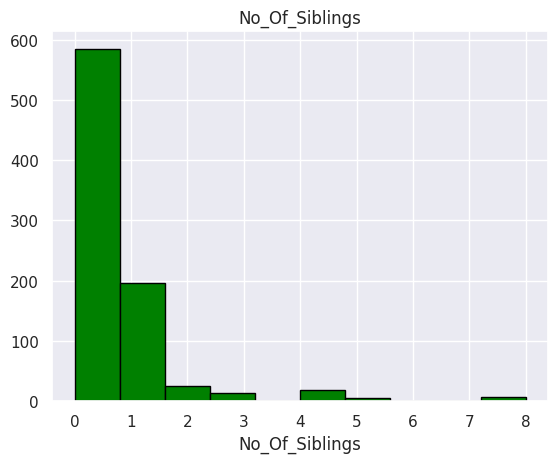

In [67]:
No_Of_Siblings = df['SibSp']
plt.hist(No_Of_Siblings, color='green', edgecolor='black')
plt.title('No_Of_Siblings')
plt.xlabel('No_Of_Siblings')


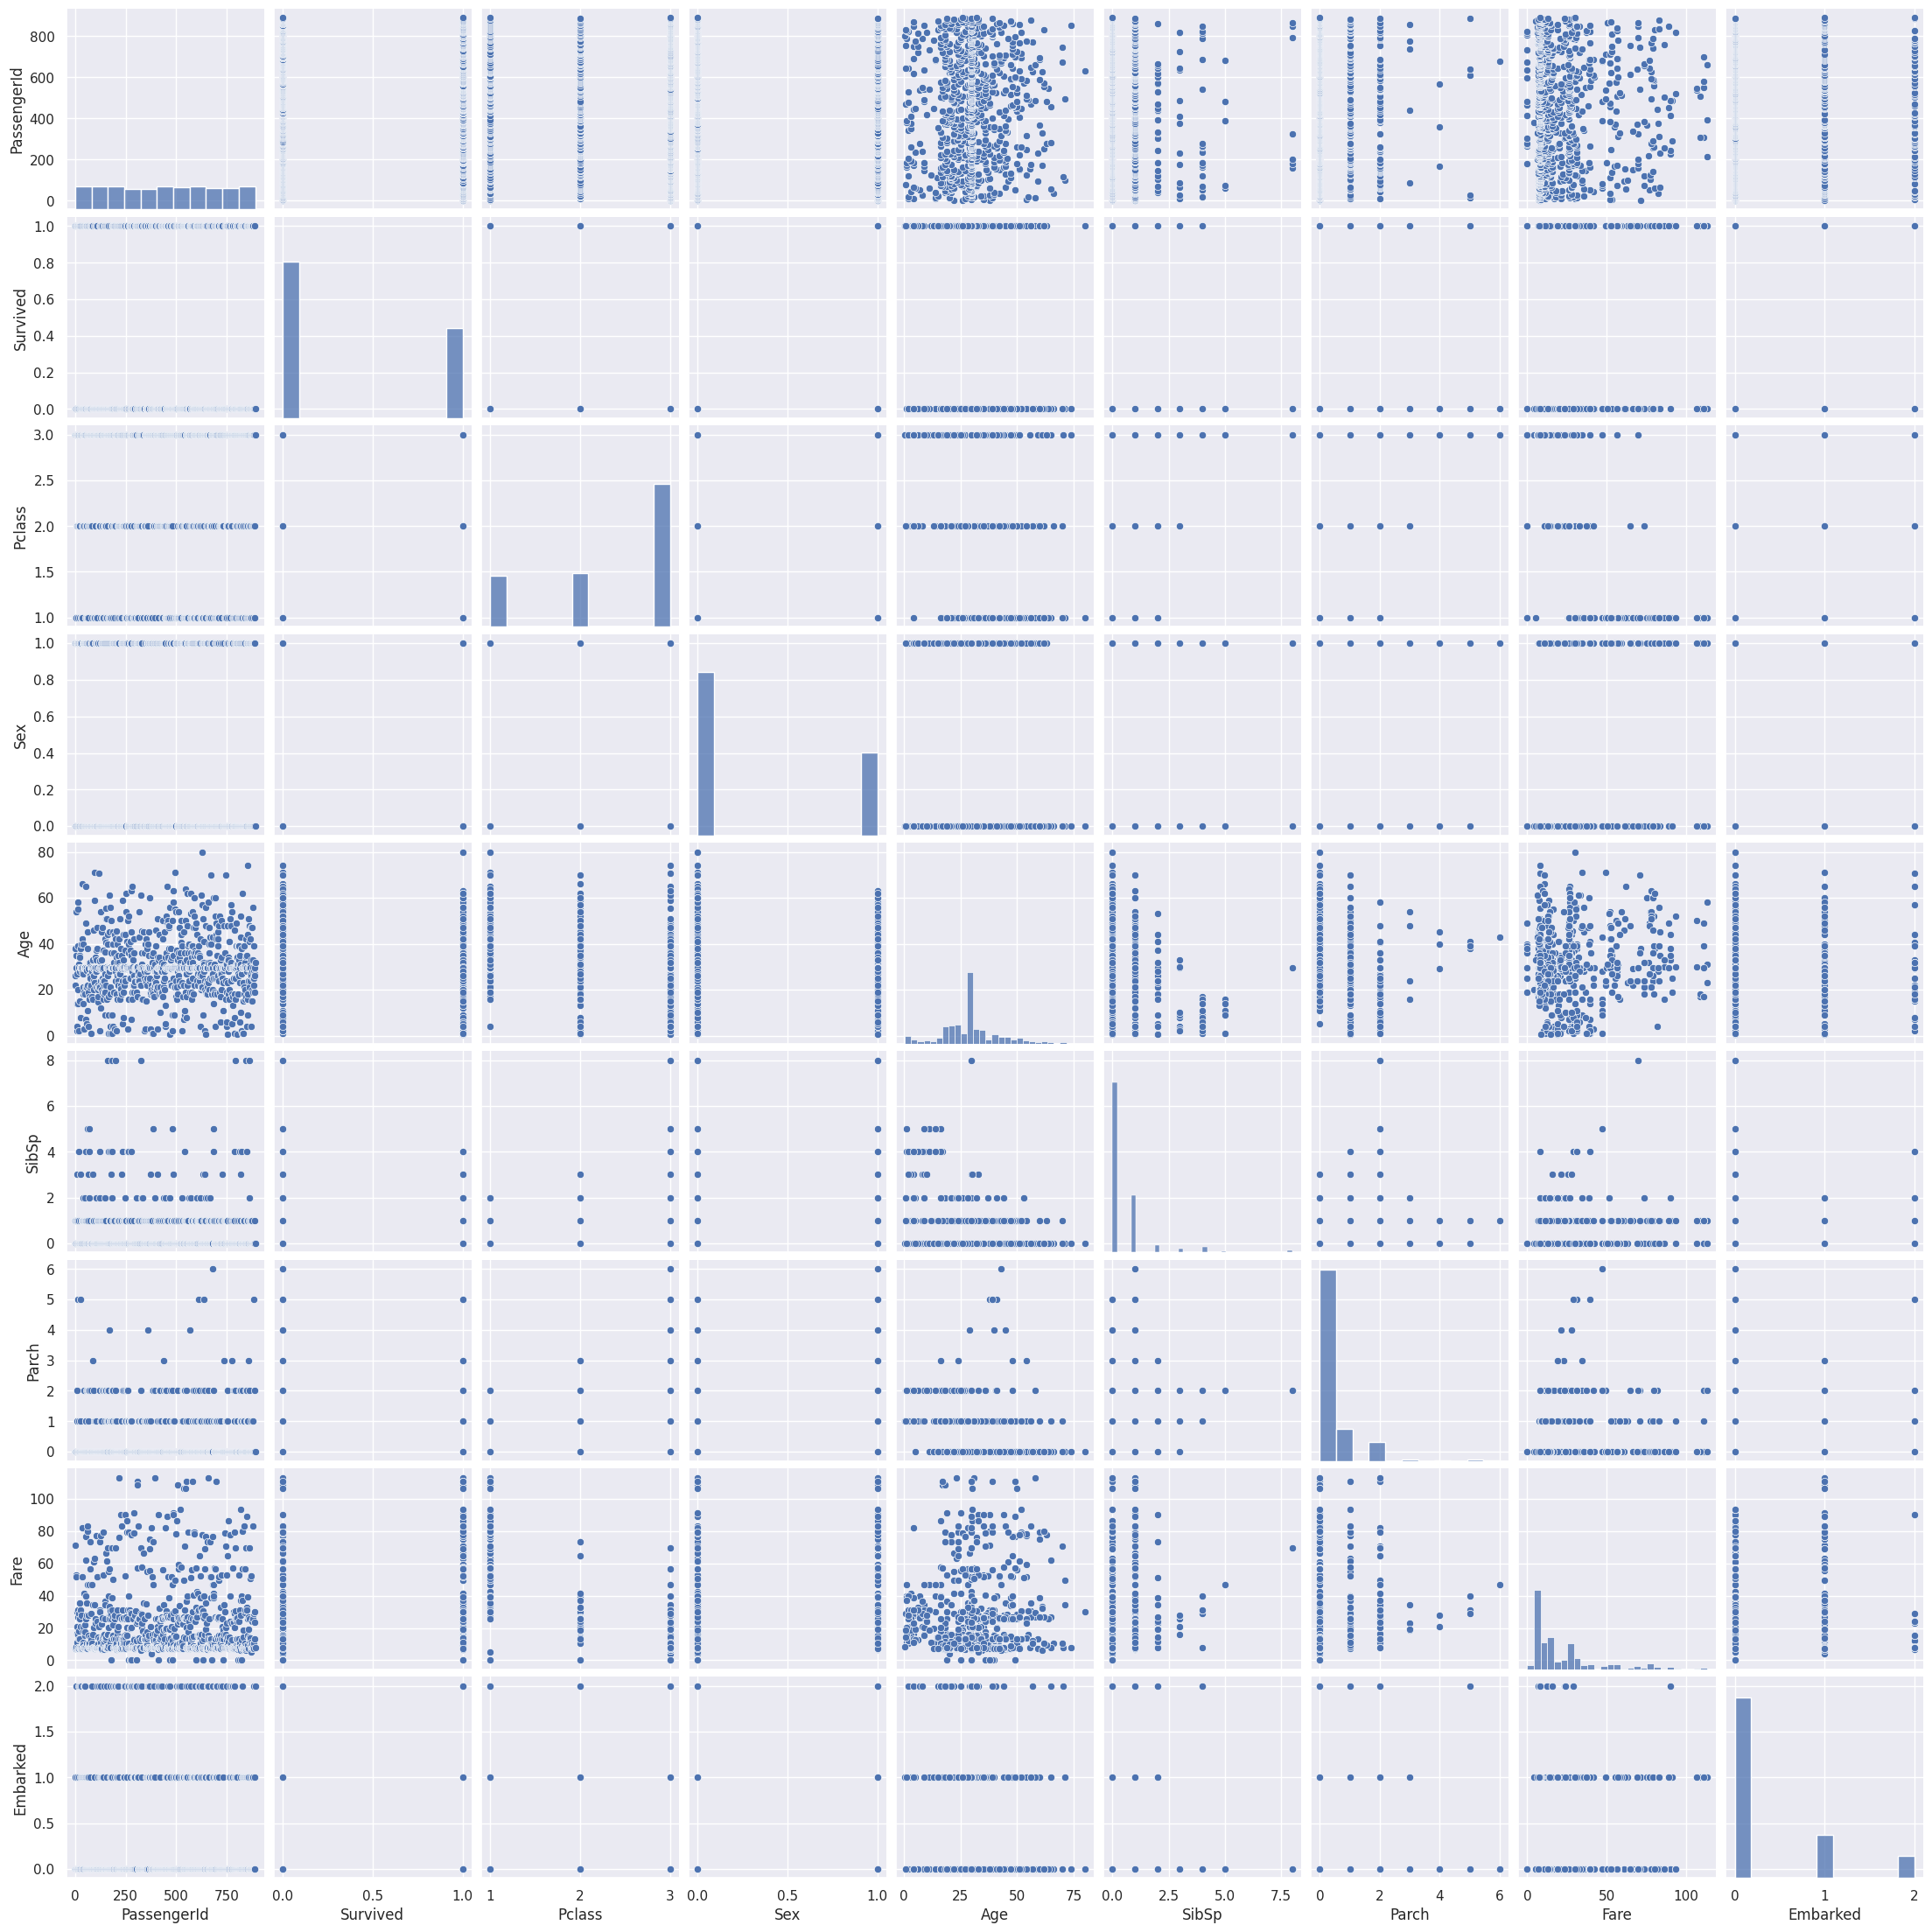

In [68]:
sns.pairplot(df)

<Figure size 1500x500 with 0 Axes>

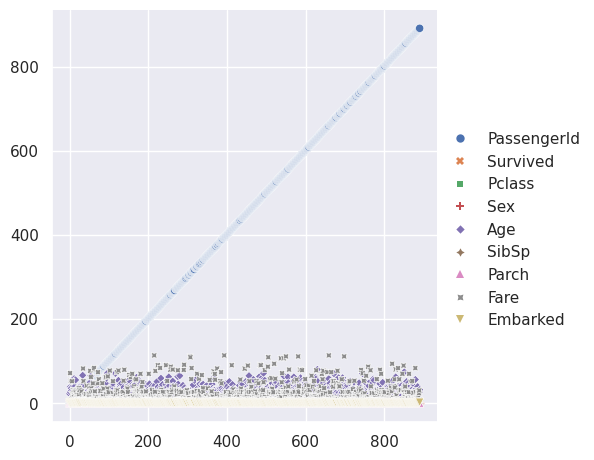

In [71]:
plt.figure(figsize =(15,5))
sns.relplot(df)

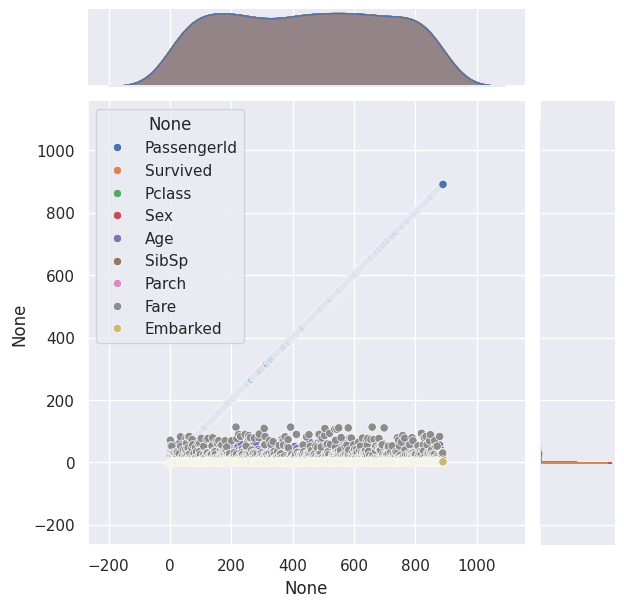

In [72]:
sns.jointplot(df)

<Axes: >

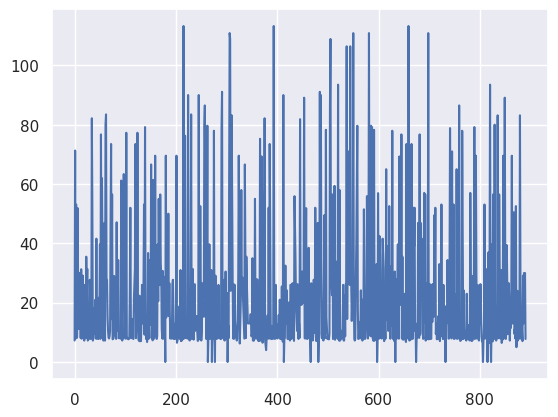

In [73]:
df['Fare'].plot()

# Encoding the Categorical Columns

In [75]:
df['Sex'].value_counts()

,count
Sex,
0,563
1,286


In [76]:
df['Embarked'].value_counts()

,count
Embarked,
0,622
1,150
2,77


In [77]:
# converting categorical Columns

df.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

<ipython-input-77-f405e8b4fb18>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)


In [78]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


Separating features & Target

In [79]:
X = df.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
Y = df['Survived']

In [80]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[849 rows x 7 columns]


In [81]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 849, dtype: int64


Splitting the data into training data & Test data

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [83]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [84]:
print(X.shape, X_train.shape, X_test.shape)

(849, 7) (679, 7) (170, 7)


# Model Training

In [85]:
model = LogisticRegression()

In [86]:
# training the Logistic Regression model with training data
model.fit(X_train, Y_train)

LogisticRegression()

# Model Evaluation

In [87]:
# accuracy on training data
X_train_prediction = model.predict(X_train)

In [88]:
print(X_train_prediction)

[0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 1
 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 0 1 0
 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0
 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 1 0 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0
 0 1 1 1 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 1 0 0
 1 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0
 0 1 0 0 1 0 1 0 1 0 1 1 

In [89]:
from sklearn.metrics import accuracy_score

In [90]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.8026509572901326


In [91]:
# accuracy on test data
X_test_prediction = model.predict(X_test)

In [92]:
print(X_test_prediction)

[0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 1 0 0 1 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0
 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 1
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 1 1 0 1
 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0]


In [93]:
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.788235294117647
